In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets\heart_attack_dataset.csv')

In [3]:
df.head(2)

Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL) Has Diabetes  \
0    Male   70                    181                  262           No   
1  Female   55                    103                  253          Yes   

  Smoking Status  Chest Pain Type          Treatment  
0          Never   Typical Angina  Lifestyle Changes  
1          Never  Atypical Angina        Angioplasty

In [4]:
df.isnull().sum()

Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df['Smoking Status'].unique()

array(['Never', 'Current', 'Former'], dtype=object)

In [7]:
df['Has Diabetes'] = df['Has Diabetes'].map({'Yes':1 , 'No':0 })

In [8]:
df.head(2)

Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Has Diabetes  \
0    Male   70                    181                  262             0   
1  Female   55                    103                  253             1   

  Smoking Status  Chest Pain Type          Treatment  
0          Never   Typical Angina  Lifestyle Changes  
1          Never  Atypical Angina        Angioplasty

In [9]:
df['Smoking Status'] = df['Smoking Status'].map({'Current':1, 'Never':0, 'Former':1})

In [10]:
df.head(2)

Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Has Diabetes  \
0    Male   70                    181                  262             0   
1  Female   55                    103                  253             1   

   Smoking Status  Chest Pain Type          Treatment  
0               0   Typical Angina  Lifestyle Changes  
1               0  Atypical Angina        Angioplasty

In [11]:
df['Chest Pain Type'] = df['Chest Pain Type'].astype('category').cat.codes

In [12]:
df.head(2)

Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Has Diabetes  \
0    Male   70                    181                  262             0   
1  Female   55                    103                  253             1   

   Smoking Status  Chest Pain Type          Treatment  
0               0                3  Lifestyle Changes  
1               0                1        Angioplasty

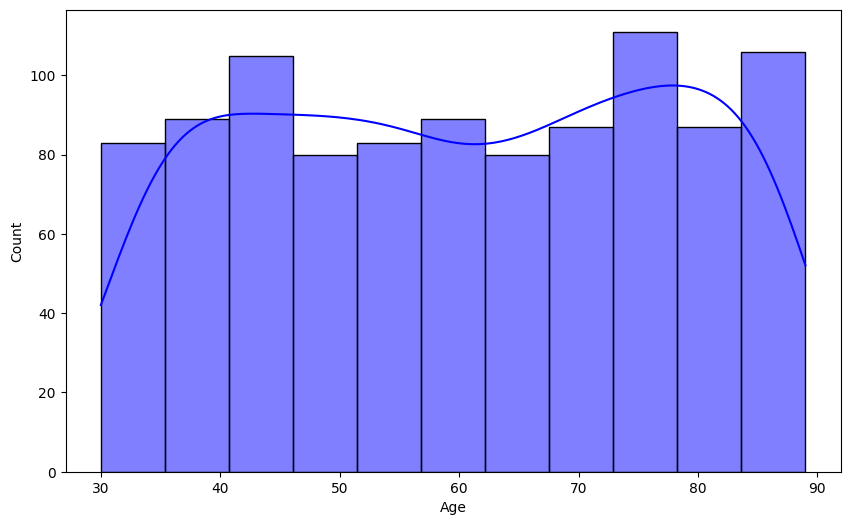

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, color='Blue')
plt.show()

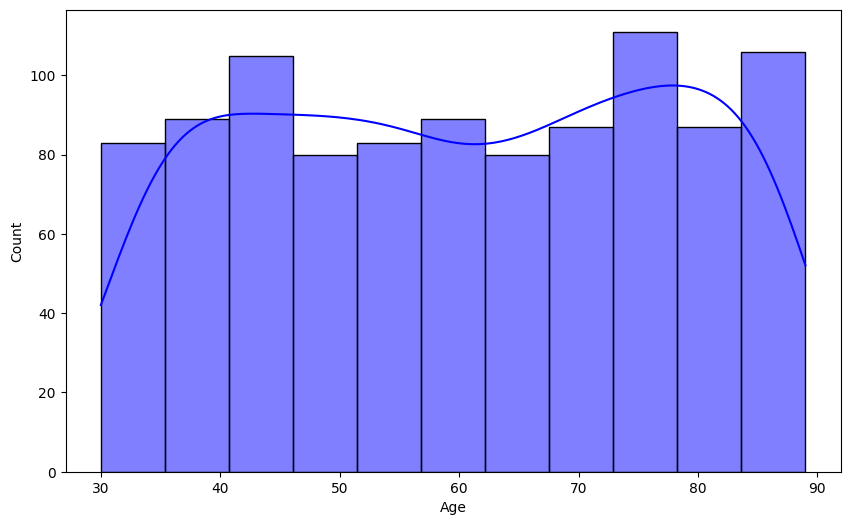

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', kde=True, color='Blue')
plt.show()

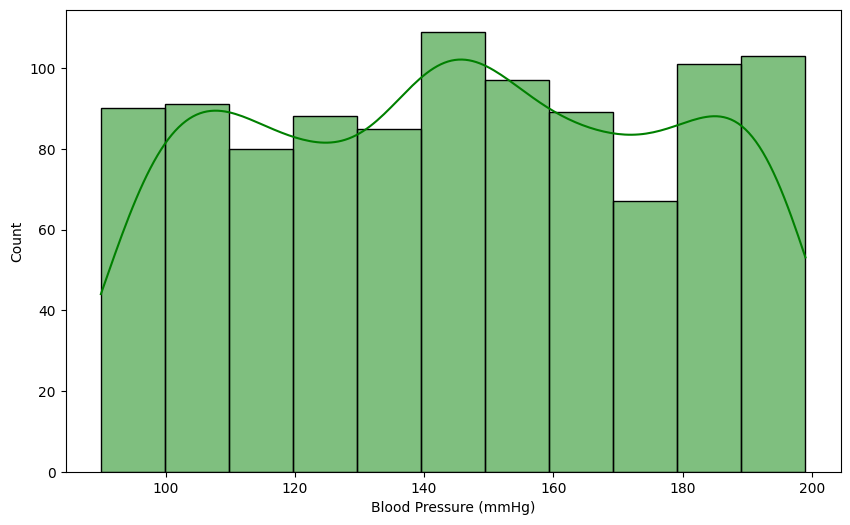

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Blood Pressure (mmHg)', kde=True, color='Green')
plt.show()

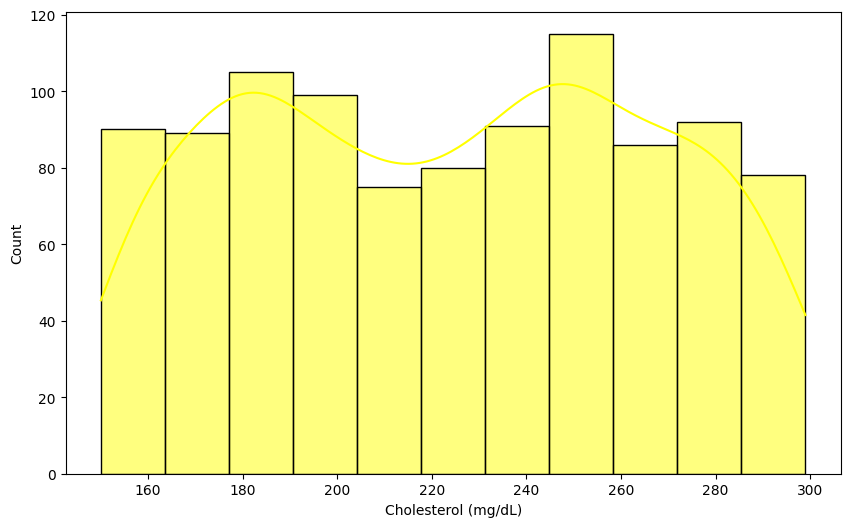

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Cholesterol (mg/dL)', kde=True, color='yellow')
plt.show()

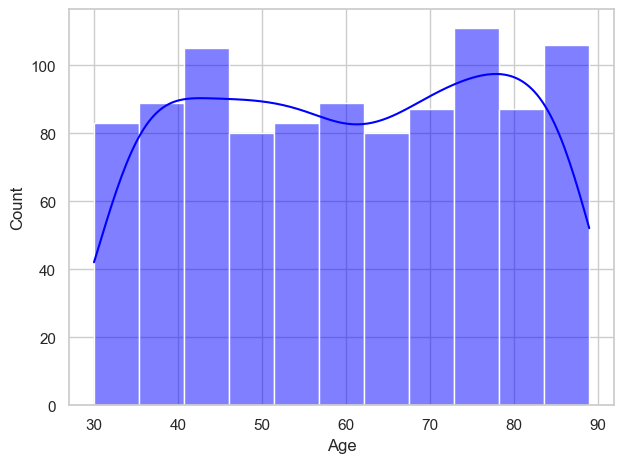

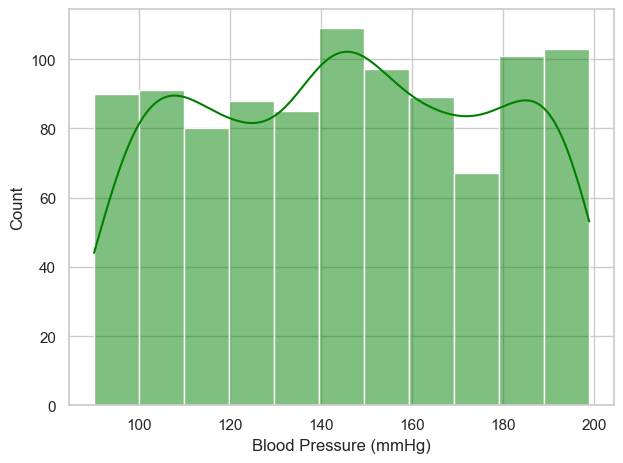

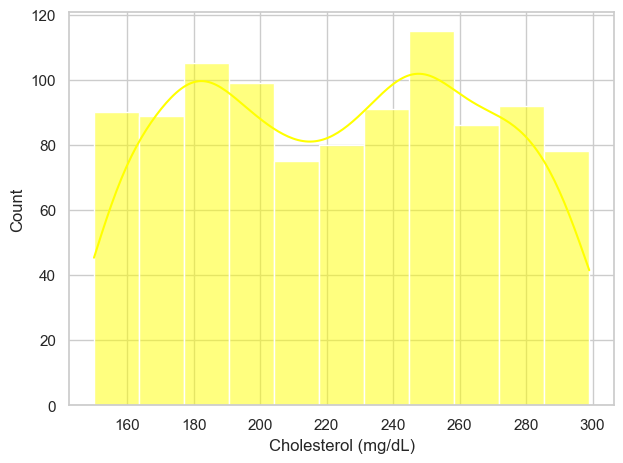

In [17]:
# plt.figure(figsize=(10,6))
list = ['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']
color_list = ['Blue','Green','yellow']

for i,clr in zip(list,color_list):
    sns.set(style='whitegrid')
    sns.histplot(data=df, x=i, kde=True, color= clr)
    plt.tight_layout()
    plt.show()

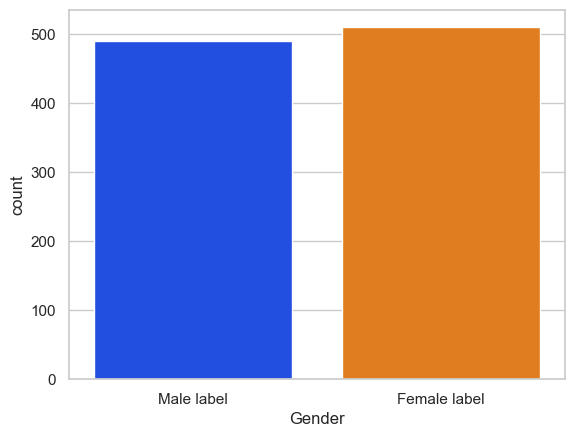

In [18]:
# plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=df, palette='bright')
plt.xticks(ticks=['Male','Female'], labels=['Male label','Female label'])
plt.show()

In [19]:
df.head(2)

Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Has Diabetes  \
0    Male   70                    181                  262             0   
1  Female   55                    103                  253             1   

   Smoking Status  Chest Pain Type          Treatment  
0               0                3  Lifestyle Changes  
1               0                1        Angioplasty

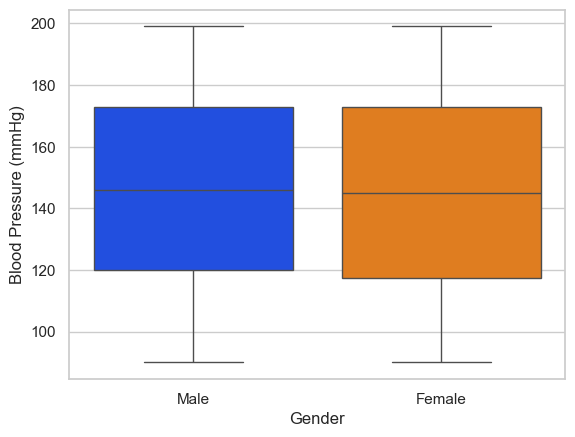

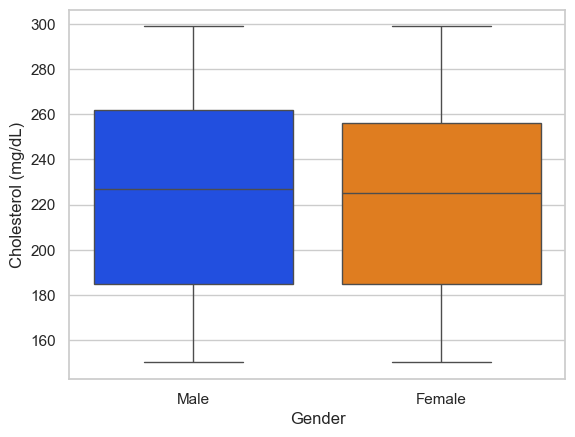

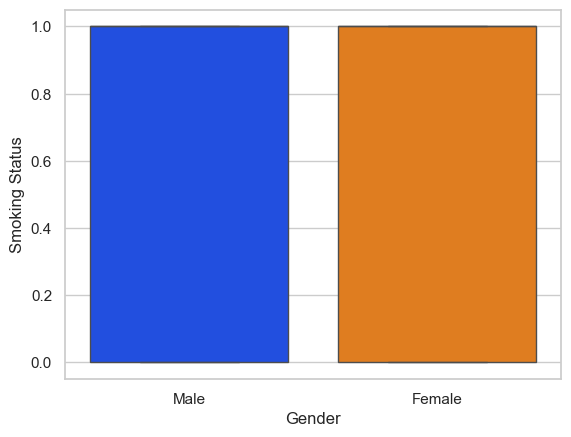

In [20]:
list = ['Blood Pressure (mmHg)', 'Cholesterol (mg/dL)', 'Smoking Status']
for i in list:
    sns.boxplot(x='Gender', y=i, data=df, palette='bright')
    plt.show()

In [21]:
def age_converter(index):
    if index > 60:
        return 'Senior citizen'
    elif index > 30:
        return 'Middle age'
    else: 
        return 'Young'

In [22]:
df['Age_class'] = df['Age'].apply(age_converter)
df.head(2)

Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Has Diabetes  \
0    Male   70                    181                  262             0   
1  Female   55                    103                  253             1   

   Smoking Status  Chest Pain Type          Treatment       Age_class  
0               0                3  Lifestyle Changes  Senior citizen  
1               0                1        Angioplasty      Middle age

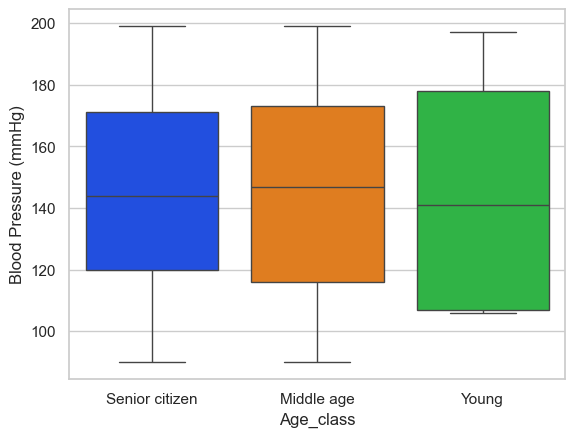

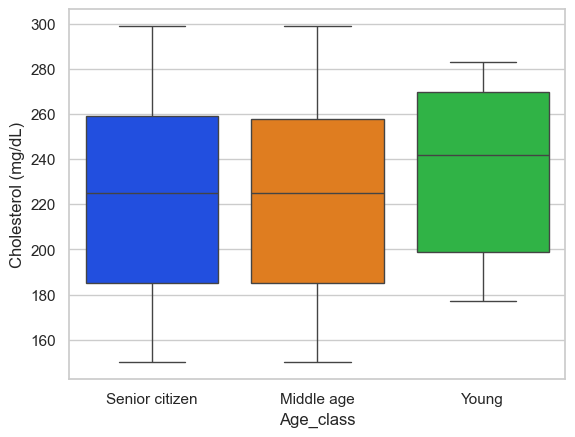

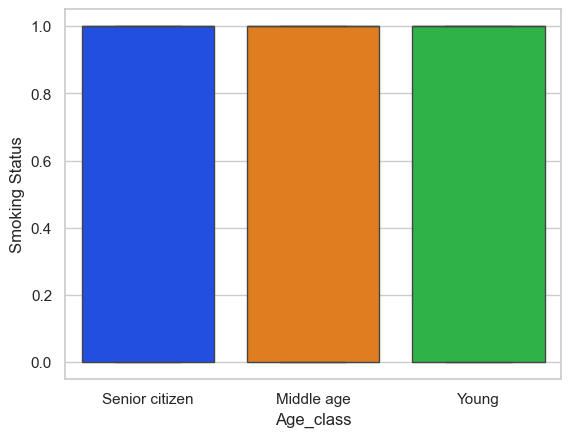

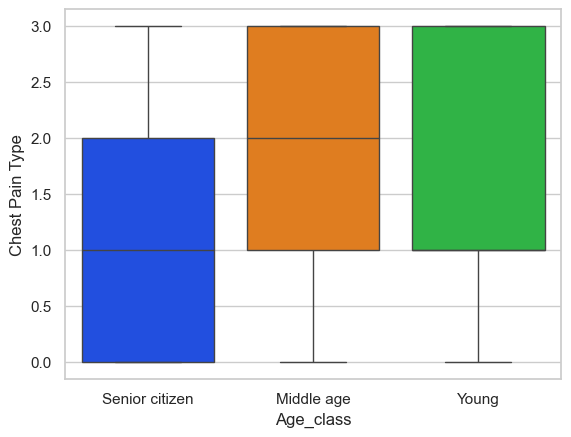

In [23]:
list = ['Blood Pressure (mmHg)', 'Cholesterol (mg/dL)', 'Smoking Status', 'Chest Pain Type']
for i in list:
    sns.boxplot(x='Age_class', y=i, data=df, palette='bright')
    plt.show()

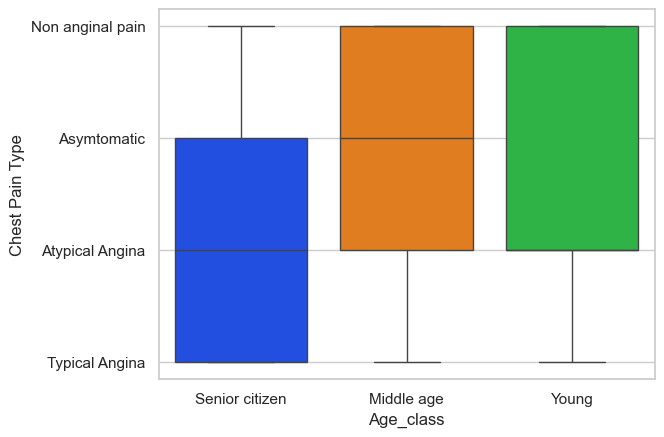

In [24]:
sns.boxplot(x='Age_class', y='Chest Pain Type', data=df, palette='bright')
plt.yticks(ticks=[0,1,2,3], labels=['Typical Angina','Atypical Angina','Asymtomatic','Non anginal pain'])
plt.show()

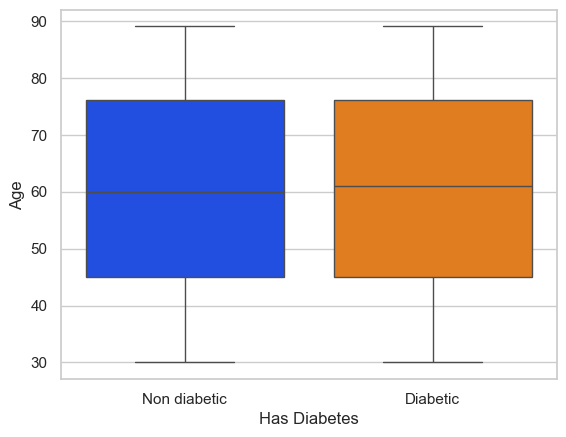

In [25]:
sns.boxplot(x='Has Diabetes', y='Age', data=df, palette='bright')
plt.xticks(ticks=[0,1], labels=['Non diabetic','Diabetic'])
plt.show()

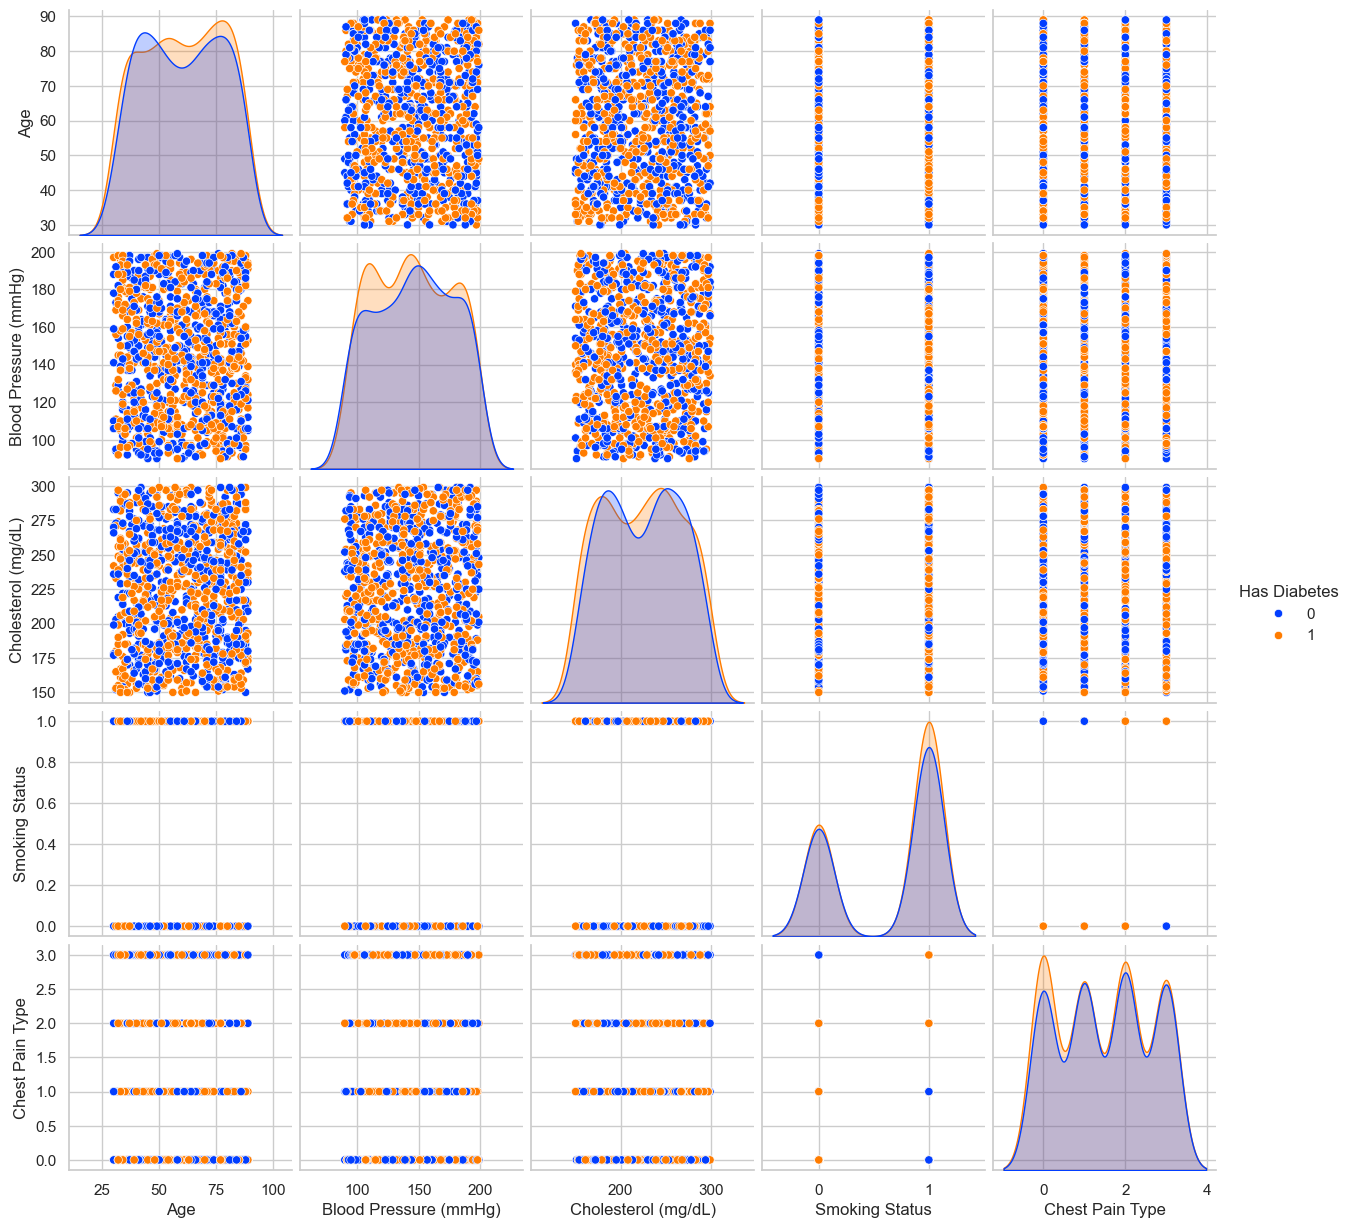

In [26]:
# plt.pie(x='Gender', data=df)

# sns.violinplot(x='Has Diabetes', y='Age', data=df, palette='bright')
# sns.swarmplot(x='Has Diabetes', y='Age', data=df, palette='bright')
sns.pairplot(df, palette='bright', hue='Has Diabetes')
plt.show()

In [27]:
df.head(2)

Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Has Diabetes  \
0    Male   70                    181                  262             0   
1  Female   55                    103                  253             1   

   Smoking Status  Chest Pain Type          Treatment       Age_class  
0               0                3  Lifestyle Changes  Senior citizen  
1               0                1        Angioplasty      Middle age

In [28]:
high_bp = df[df['Blood Pressure (mmHg)'] > 140]
high_bp.head(2)

Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Has Diabetes  \
0   Male   70                    181                  262             0   
4   Male   86                    187                  296             1   

   Smoking Status  Chest Pain Type          Treatment       Age_class  
0               0                3  Lifestyle Changes  Senior citizen  
4               1                2         Medication  Senior citizen

In [29]:
high_choles = df[df['Cholesterol (mg/dL)']>240]
high_choles.head(2)

Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Has Diabetes  \
0    Male   70                    181                  262             0   
1  Female   55                    103                  253             1   

   Smoking Status  Chest Pain Type          Treatment       Age_class  
0               0                3  Lifestyle Changes  Senior citizen  
1               0                1        Angioplasty      Middle age

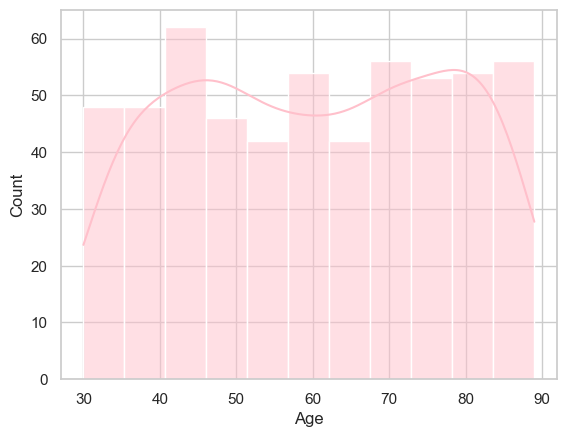

In [30]:
sns.histplot(data=high_bp, x='Age', kde= True, color='pink')
# sns.histplot(data=df, x='Age', kde=True, color='Blue')
plt.show()

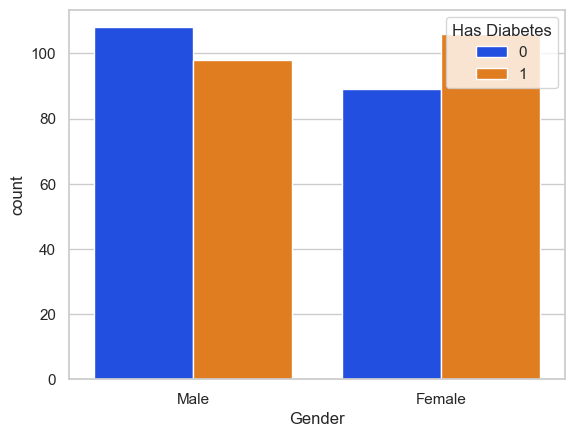

In [31]:
sns.countplot(x='Gender', data=high_choles, hue='Has Diabetes', palette='bright')
plt.show()

In [32]:
import plotly.express as px

# Interactive scatter plot for Age vs. Cholesterol colored by Chest Pain Type
fig = px.scatter(df, x='Age', y='Cholesterol (mg/dL)', color='Chest Pain Type',
                 color_continuous_scale='Viridis', title='Age vs. Cholesterol by Chest Pain Type',
                 labels={'Age': 'Age', 'Cholesterol (mg/dL)': 'Cholesterol (mg/dL)', 'Chest Pain Type': 'Chest Pain Type'},
                 hover_data={'Age': True, 'Cholesterol (mg/dL)': True, 'Chest Pain Type': True})

fig.update_layout(
    title='Age vs. Cholesterol by Chest Pain Type',
    xaxis_title='Age',
    yaxis_title='Cholesterol (mg/dL)',
    margin=dict(t=50, l=50, r=50, b=50)
)

fig.show()